# 7 Timeseries

## Imports

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

/Users/paulo/Library/Caches/pypoetry/virtualenvs/modern-pandas-qNueo_Sl-py3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Data

In [2]:
gs = web.DataReader("GS", data_source="yahoo", start="2006-01-01", end="2010-01-01")
gs.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.44,124.23,126.70,128.87,6188700.0,107.57
2006-01-04,128.91,126.38,127.35,127.09,4861600.0,106.09
2006-01-05,127.32,125.61,126.00,127.04,3717400.0,106.05
2006-01-06,129.25,127.29,127.29,128.84,4319600.0,107.55
2006-01-09,130.62,128.00,128.50,130.39,4723500.0,108.84


## Special slicing

<div class="alert alert-block alert-info">
    <b>Techniques of note</b>
    <br><br>
    <li><b><code>df.loc["2006"]</code></b> can slice using strings for dates</li>
</div>

Timestamp slices have a special feature where you can slice using strings

In [3]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

In [5]:
# Bad
# Works—but a pain to write
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.574997
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089142
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.047379
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,107.549896
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,108.843857


In [6]:
# Good!
gs.loc["2006"].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.574997
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089142
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.047379
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,107.549896
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,108.843857


## Special methods

<div class="alert alert-block alert-info">
    <b>Techniques of note</b>
    <br><br>
    <li><b><code>.resample</code></b> Can split time series into groups by <i>time frames</i> and apply a function to each group. Returns a grouped shape.</li>
    <li><b><code>.rolling</code></b> Can split time series into groups by <i>rows</i> and apply a function to each group. Returns the same shape.</li>
    <li><b><code>.expanding</code></b> Can apply a function to all rows before it.</li>
    <li><b><code>.ewm</code></b> To apply exponentially weighted functions.</li>
</div>

In [8]:
gs.resample("5d").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,128.730001,125.877501,126.834999,127.959997,4.771825e+06,106.815353
2006-01-08,132.645000,130.205002,130.349998,131.660000,4.664300e+06,109.903973
2006-01-13,133.395004,131.244995,131.510002,132.924995,3.258250e+06,110.959911
2006-01-18,133.853333,131.656667,132.210002,132.543335,4.997767e+06,110.709785
2006-01-23,136.083997,133.310001,133.771997,135.153998,3.968500e+06,113.031767


In [9]:
gs.resample("W").agg(["mean", "sum"]).head()

High                     Low                    Open  \
                  mean         sum        mean         sum        mean   
Date                                                                     
2006-01-08  128.730001  514.920006  125.877501  503.510002  126.834999   
2006-01-15  132.848001  664.240005  130.544000  652.720001  130.684000   
2006-01-22  133.672501  534.690002  131.389999  525.559998  131.907501   
2006-01-29  136.083997  680.419983  133.310001  666.550003  133.771997   
2006-02-05  142.467999  712.339996  139.937997  699.689987  140.900000   

                             Close                 Volume              \
                   sum        mean         sum       mean         sum   
Date                                                                    
2006-01-08  507.339996  127.959997  511.839989  4771825.0  19087300.0   
2006-01-15  653.419998  131.979999  659.899994  4310420.0  21552100.0   
2006-01-22  527.630005  132.555000  530.220001  4653725.0  18614900.0   
2006-01-29  668.859985  135.153998  675.769989  3968500.0  19842500.0   
2006-02-05  704.500000  141.618002  708.090012  3920120.0  19600600.0   

             Adj Close              
                  mean         sum  
Date                                
2006-01-08  106.815353  427.261414  
2006-01-15  110.171089  550.855446  
2006-01-22  110.702406  442.809624  
2006-01-29  113.031767  565.158836  
2006-02-05  118.437737  592.188683

In [10]:
gs.resample("6H").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 00:00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,107.574997
2006-01-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089142


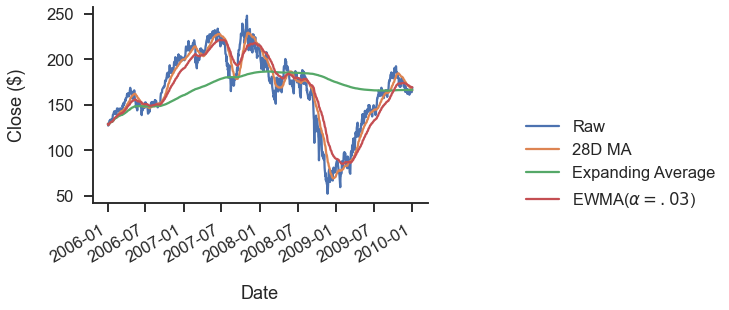

In [20]:
gs.Close.plot(label='Raw')
gs.Close.rolling(28).mean().plot(label='28D MA')
gs.Close.expanding().mean().plot(label='Expanding Average')
gs.Close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.ylabel("Close ($)")
sns.despine();

In [22]:
roll = gs.Close.rolling(30, center=True)
roll

Rolling [window=30,center=True,axis=0]

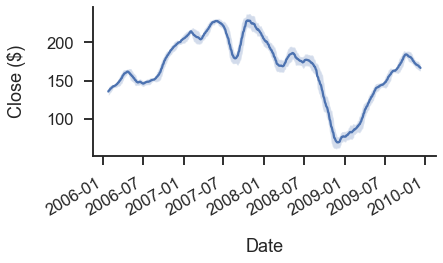

In [23]:
m = roll.agg(["mean", "std"])
ax = m["mean"].plot()
ax.fill_between(m.index, m["mean"] - m["std"], m["mean"] + m["std"], alpha=0.25)
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

## Grab bag

<div class="alert alert-block alert-info">
    <b>Techniques of note</b>
    <br><br>
    <li><b><code>DateOffset</code></b> Add an offset to dates.</li>
    <li><b><code>tseries.holiday</code></b> To get holidays.</li>
    <li><b><code>tz_localize</code></b> To assign a timezone.</li>
    <li><b><code>tz_convert</code></b> To convert to different timezone.</li>
</div>

### Offsets

In [24]:
gs.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [25]:
gs.index + pd.DateOffset(months=3, days=-2)

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

### Holiday calendar

In [27]:
from pandas.tseries.holiday import USColumbusDay

In [29]:
USColumbusDay.dates("2015-01-01", "2020-01-01")

DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

### Timezones

In [30]:
gs.tz_localize('US/Eastern').tz_convert('UTC').head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 05:00:00+00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,107.574997
2006-01-04 05:00:00+00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089142
2006-01-05 05:00:00+00:00,127.320000,125.610001,126.000000,127.040001,3717400.0,106.047379
2006-01-06 05:00:00+00:00,129.250000,127.290001,127.290001,128.839996,4319600.0,107.549896
2006-01-09 05:00:00+00:00,130.619995,128.000000,128.500000,130.389999,4723500.0,108.843857


## Modeling time series

Predict average monthly flights

<div class="alert alert-block alert-info">
    <b>Techniques of note</b>
    <br><br>
    <li><b><code>.shift</code></b> To add lagged values.</li>
</div>

### Data

In [31]:
import os
import io
import glob
import zipfile
from utils import download_timeseries

import statsmodels.api as sm


def download_many(start, end):
    months = pd.period_range(start, end=end, freq="M")
    # We could easily parallelize this loop.
    for i, month in enumerate(months):
        download_timeseries(month)


def time_to_datetime(df, columns):
    """
    Combine all time items into datetimes.

    2014-01-01,1149.0 -> 2014-01-01T11:49:00
    """

    def converter(col):
        timepart = (
            col.astype(str)
            .str.replace("\.0$", "")  # NaNs force float dtype
            .str.pad(4, fillchar="0")
        )
        return pd.to_datetime(
            df["fl_date"]
            + " "
            + timepart.str.slice(0, 2)
            + ":"
            + timepart.str.slice(2, 4),
            errors="coerce",
        )
        return datetime_part

    df[columns] = df[columns].apply(converter)
    return df


def read_one(fp):
    df = (
        pd.read_csv(fp, encoding="latin1")
        .rename(columns=str.lower)
        .drop("unnamed: 6", axis=1)
        .pipe(
            time_to_datetime, ["dep_time", "arr_time", "crs_arr_time", "crs_dep_time"]
        )
        .assign(fl_date=lambda x: pd.to_datetime(x["fl_date"]))
    )
    return df

In [75]:
def unzip_one(zip_file):
    """Written by me."""
    dir_name = zip_file.replace(".zip", "")
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(dir_name)
    file = glob.glob(f"{dir_name}/*.csv")[0]
    return file

In [76]:
store = "data/ts.hdf5"

if not os.path.exists(store):
    download_many("2000-01-01", "2016-01-01")

    zips = glob.glob(os.path.join("data", "timeseries", "*.zip"))
    csvs = [unzip_one(fp) for fp in zips]
    dfs = [read_one(fp) for fp in csvs]
    df = pd.concat(dfs, ignore_index=True)

    df["origin"] = df["origin"].astype("category")
    df.to_hdf(store, "ts", format="table")
else:
    df = pd.read_hdf(store, "ts")

In [77]:
df.dtypes

fl_date         datetime64[ns]
origin                category
crs_dep_time    datetime64[ns]
dep_time        datetime64[ns]
crs_arr_time    datetime64[ns]
arr_time        datetime64[ns]
dtype: object

### Modeling

First find historic values (average monthly flights)

In [78]:
daily = df.fl_date.value_counts().sort_index()
y = daily.resample("MS").mean()
y.head()

2000-01-01    15176.677419
2000-02-01    15327.551724
2000-03-01    15578.838710
2000-04-01    15442.100000
2000-05-01    15448.677419
Freq: MS, Name: fl_date, dtype: float64

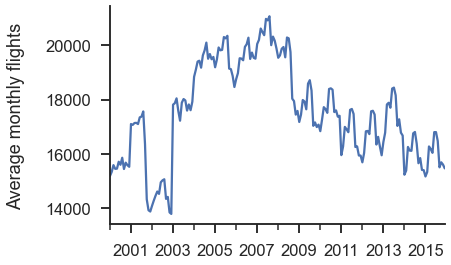

In [79]:
ax = y.plot()
ax.set(ylabel="Average monthly flights")
sns.despine()

In [80]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

With time series,
most important features are the previous
—or _lagged_—
values.

Start by manually running regression on lagged values of itself.
This will suffer from:

- Multicollinearity
- Autocorrelation
- Non-stationary
- Seasonality

In [81]:
X = pd.concat(
    [y.shift(i) for i in range(6)],
    axis=1,
    keys=["y"] + ["L%s" % i for i in range(1, 6)],
).dropna()
X.head()

,y,L1,L2,L3,L4,L5
2000-06-01,15703.333333,15448.677419,15442.100000,15578.838710,15327.551724,15176.677419
2000-07-01,15591.677419,15703.333333,15448.677419,15442.100000,15578.838710,15327.551724
2000-08-01,15850.516129,15591.677419,15703.333333,15448.677419,15442.100000,15578.838710
2000-09-01,15436.566667,15850.516129,15591.677419,15703.333333,15448.677419,15442.100000
2000-10-01,15669.709677,15436.566667,15850.516129,15591.677419,15703.333333,15448.677419


Now fit to the lagged values using statsmodels.

In [82]:
mod_lagged = smf.ols(
    "y ~ trend + L1 + L2 + L3 + L4 + L5", data=X.assign(trend=np.arange(len(X)))
)
res_lagged = mod_lagged.fit()
res_lagged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     259.7
Date:                Fri, 08 May 2020   Prob (F-statistic):           7.80e-86
Time:                        15:54:17   Log-Likelihood:                -1452.3
No. Observations:                 187   AIC:                             2919.
Df Residuals:                     180   BIC:                             2941.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1097.3866    457.003      2.401      0.017     195.613    1999.160
trend         -0.8778      0.796     -1.103      0.271      -2.448       0.692
L1             1.0104      0.074     13.565      0.000       0.863       1.157
L2            -0.0755      0.106     -0.716      0.475      -0.284       0.133
L3            -0.0611      0.106     -0.578      0.564      -0.269       0.147
L4             0.1109      0.106      1.045      0.297      -0.099       0.320
L5            -0.0425      0.075     -0.569      0.570      -0.190       0.105
==============================================================================
Omnibus:                       74.738   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.210
Skew:                           1.112   Prob(JB):                    2.43e-190
Kurtosis:                      13.350   Cond. No.                     4.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Problems

##### Multicollinearity.

Correlation between different columns.

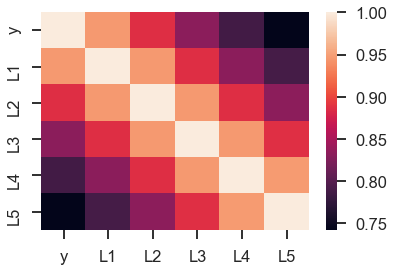

In [83]:
sns.heatmap(X.corr())

You would expect
coefficients to gradually decline to zero.
Most recent data is most important.
Second most recent data is second most important.
etc

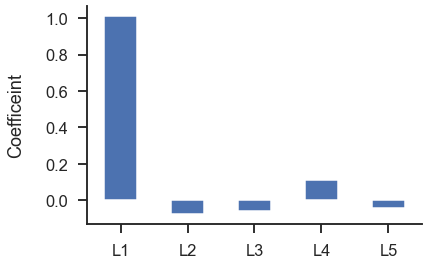

In [84]:
ax = res_lagged.params.drop(['Intercept', 'trend']).plot.bar(rot=0)
plt.ylabel('Coefficeint')
sns.despine()

##### Autocorrelation

Pattern in the residuals of your regression.
Residuals should be white noise.
In this case
if a residual at time `t` was above expectation,
than residual at `t + 1` is much more likely
to be above average as well.

In [85]:
# `Results.resid` is a Series of residuals: y - ŷ
mod_trend = sm.OLS.from_formula(
    "y ~ trend", data=y.to_frame(name="y").assign(trend=np.arange(len(y)))
)
res_trend = mod_trend.fit()

(<matplotlib.axes._subplots.AxesSubplot at 0x222be5d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x167be8430>)

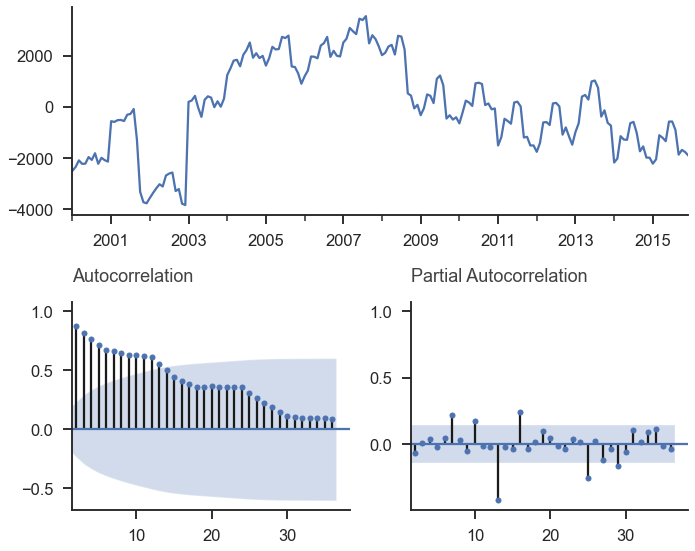

In [86]:
def tsplot(y, lags=None, figsize=(10, 8)):
    """Plot residuals."""
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax
tsplot(res_trend.resid, lags=36)

The top subplot shows the time series of residual $e_t$—
which should be white noise.

The bottom shows autocorrelation
of the residuals as a correlogram.
It measures the correlation between a value
and its lagged self.

The bottom right plot is partial autocorrelation.

##### Stationary

Stationary data
means that the
variance, mean, and autocorrelation structure
do not change over time.

Typically this means a flat-looking series,
without trend.

One way to handle non-stationary data
is to difference the non-stationary variable
until it is stationary.

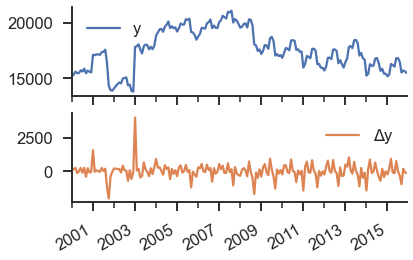

In [87]:
y.to_frame(name="y").assign(Δy=lambda x: x.y.diff()).plot(subplots=True)
sns.despine()

One way to quantify
whether a series is non-stationary
is the **Augmented Dickey-Fuller** test.

The null hypothesis in the test
is that the data is non-stationary,
and therefore needs to be differenced.

The alternate hypothesis is that is is stationary,
and therefore does not need to be differenced.

This test is available in `smt.adfuller` in stastmodels.

In [88]:
from collections import namedtuple

ADF = namedtuple("ADF", "adf pvalue usedlag nobs critical icbest")
ADF(*smt.adfuller(y))._asdict()

{'adf': -1.4966438036108376,
 'pvalue': 0.5351709431125571,
 'usedlag': 15,
 'nobs': 176,
 'critical': {'1%': -3.4680615871598537,
  '5%': -2.8781061899535128,
  '10%': -2.5756015922004134},
 'icbest': 2692.479570353238}

So here we failed to reject the null hypothesis.
Difference it and try again.

In [89]:
ADF(*smt.adfuller(y.diff().dropna()))._asdict()

{'adf': -3.6703777738340553,
 'pvalue': 0.0045496451931143714,
 'usedlag': 14,
 'nobs': 176,
 'critical': {'1%': -3.4680615871598537,
  '5%': -2.8781061899535128,
  '10%': -2.5756015922004134},
 'icbest': 2678.8097543041577}

Now fit another OLS model.

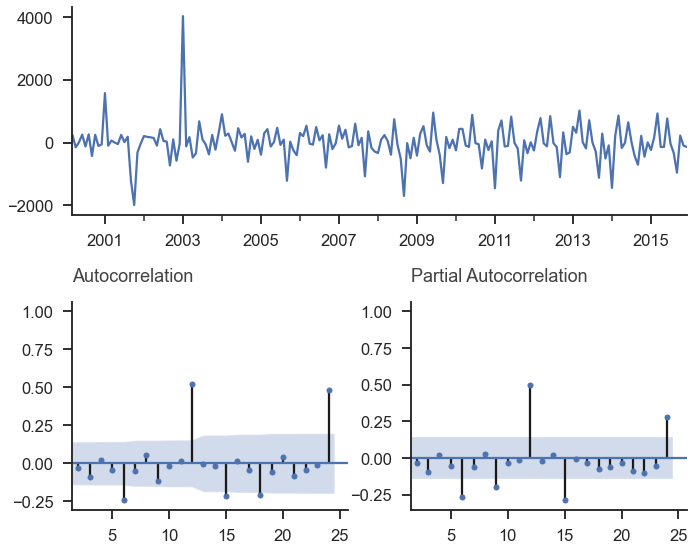

In [90]:
data = (
    y.to_frame(name="y")
    .assign(Δy=lambda df: df.y.diff())
    .assign(LΔy=lambda df: df.Δy.shift())
)
mod_stationary = smf.ols("Δy ~ LΔy", data=data.dropna())
res_stationary = mod_stationary.fit()
tsplot(res_stationary.resid, lags=24);

##### Seasonality

We have a strong monthly seasonality.

/Users/paulo/Library/Caches/pypoetry/virtualenvs/modern-pandas-qNueo_Sl-py3.8/lib/python3.8/site-packages/statsmodels/tsa/seasonal.py:304: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


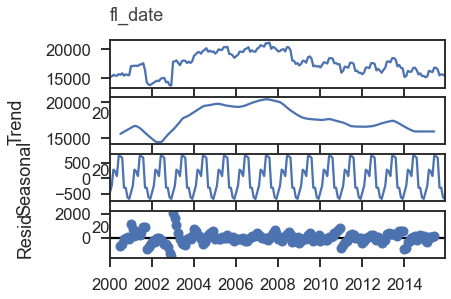

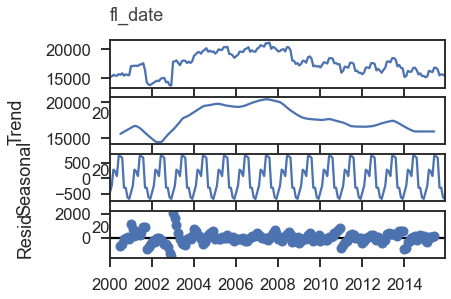

In [91]:
smt.seasonal_decompose(y).plot()

#### ARIMA

ARIMA can handle all the problems specified:

- Multicollinearity
- Autocorrelation
- Non-stationary
- Seasonality

**A**utoRegressive  
**I**ntegrated  
**M**oving  
**A**verage  

##### **A**utoRegressive

Predict a variable
by a linear combination
of its lagged values

$$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + e_t$$

Where `p` is the number of lagged values and `c` is a constant and `e` is white noise.

##### **I**ntegrated

The opposite of differencing.
Deals with stationarity.
If you have to difference your dataset 1 time to get it stationary, then $d=1$.

$\Delta y_t = y_t - y_{t-1}$ for $d=1$.

##### **M**oving **A**verage

$$y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \ldots + \theta_q e_{t-q}$$

Here the coefficients are residuals from previous predictions. 

##### Combine

$$\Delta y_t = c + \phi_1 \Delta y_{t-1} + \theta_t e_{t-1} + e_t$$

Using lag notation, where $L y_t = y_{t-1}$, i.e. y.shift() in pandas, we can rewrite that as

$$(1 - \phi_1 L) (1 - L)y_t = c + (1 + \theta L)e_t$$

for our specific `ARIMA(1, 1, 1)` model

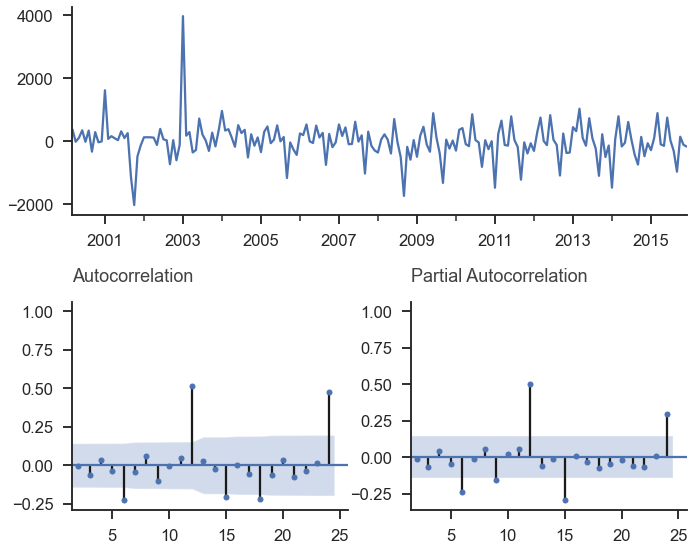

In [93]:
mod = smt.SARIMAX(y, trend='c', order=(1, 1, 1))
res = mod.fit()
tsplot(res.resid[2:], lags=24);

In [95]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                fl_date   No. Observations:                  192
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1485.122
Date:                Fri, 08 May 2020   AIC                           2978.244
Time:                        18:11:24   BIC                           2991.253
Sample:                    01-01-2000   HQIC                          2983.513
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7984      3.961      0.202      0.840      -6.965       8.562
ar.L1          0.8680      0.202      4.303      0.000       0.473       1.263
ma.L1         -0.9105      0.159     -5.728      0.000      -1.222      -0.599
sigma2      3.305e+05   1.56e+04     21.244      0.000       3e+05    3.61e+05
===================================================================================
Ljung-Box (Q):                      215.78   Jarque-Bera (JB):              1191.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             1.12
Prob(H) (two-sided):                  0.08   Kurtosis:                        15.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looks better,
but still needs seasonality adjustment.

Seasonal ARIMA model is written as
$\mathrm{ARIMA}(p,d,q)×(P,D,Q)_s$.
Lowercase letters are non-seasonal components.
Upper-case letters are similar specification for seasonal component—
where $s$ is the periodicity
(4 quarterly, 12 monthly).

We multiply the two processes—
one for seasonal
and one for non-seasonal—
together.

So the nonseasonal component is

- $p=1$: period autoregressive: use $y_{t-1}$
- $d=1$: one first-differencing of the data (one month)
- $q=2$: use the previous two non-seasonal residual, $e_{t-1}$     $e_{t-2}$, to forecast

And the seasonal component is

- $P=0$: Don't use any previous seasonal values
- $D=1$: Difference the series 12 periods back: y.diff(12)
- $Q=2$: Use the two previous seasonal residuals

In [96]:
mod_seasonal = smt.SARIMAX(
    y,
    trend="c",
    order=(1, 1, 2),
    seasonal_order=(0, 1, 2, 12),
    simple_differencing=False,
)
res_seasonal = mod_seasonal.fit()
res_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            fl_date   No. Observations:                  192
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1349.500
Date:                            Fri, 08 May 2020   AIC                           2713.000
Time:                                    18:17:07   BIC                           2735.312
Sample:                                01-01-2000   HQIC                          2722.047
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -17.4118   2.25e+04     -0.001      0.999   -4.41e+04    4.41e+04
ar.L1         -0.9999   2587.035     -0.000      1.000   -5071.495    5069.495
ma.L1          1.0558   2587.018      0.000      1.000   -5069.407    5071.518
ma.L2          0.0558    144.426      0.000      1.000    -283.015     283.126
ma.S.L12      -0.8669      0.055    -15.690      0.000      -0.975      -0.759
ma.S.L24       0.3197      0.048      6.680      0.000       0.226       0.414
sigma2       1.79e+05   9996.849     17.909      0.000    1.59e+05    1.99e+05
===================================================================================
Ljung-Box (Q):                       31.93   Jarque-Bera (JB):              1409.86
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

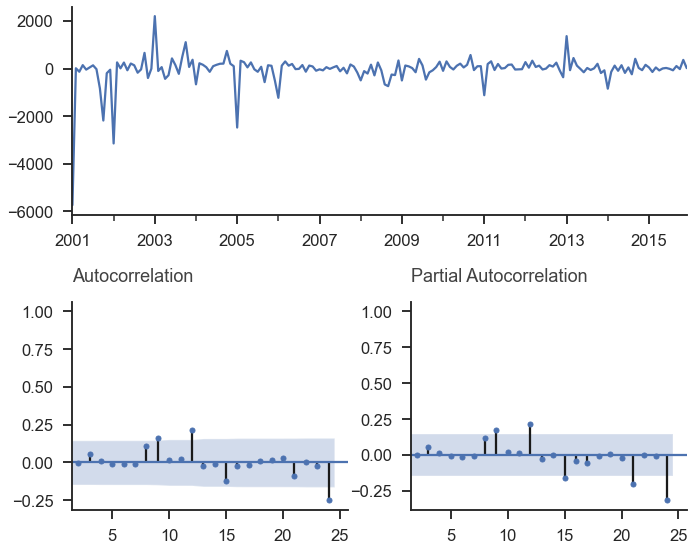

In [98]:
tsplot(res_seasonal.resid[12:], lags=24);

Looks much better!

In reality user grid search to find parameters.
Optimize for AIC or BIC.

Tips [on this blog post](https://otexts.com/fpp2/arima-r.html) and [this stackoverflow answer](https://stackoverflow.com/questions/22770352/auto-arima-equivalent-for-python/22770973#22770973).

### Forecasting

Do one step ahead forecast.
At each point (month),
we take the history up to that point
and make a forecast.

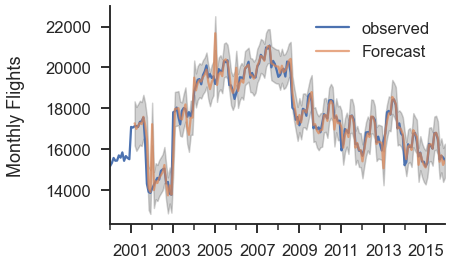

In [99]:
pred = res_seasonal.get_prediction(start="2001-03-01")
pred_ci = pred.conf_int()
ax = y.plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Forecast", alpha=0.7)
ax.fill_between(
    pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color="k", alpha=0.2
)
ax.set_ylabel("Monthly Flights")
plt.legend()
sns.despine()

There are a few places
where the observed data goes outside
the 95% confidence interval.

We can make dynamic forecasts
as of some month.
The forecast from that point forward
will only use information available as of January 2013.

It still work similar to the one-step process above.
But instead of predicting on actual values
after January 2013,
you predict on the forecast values.

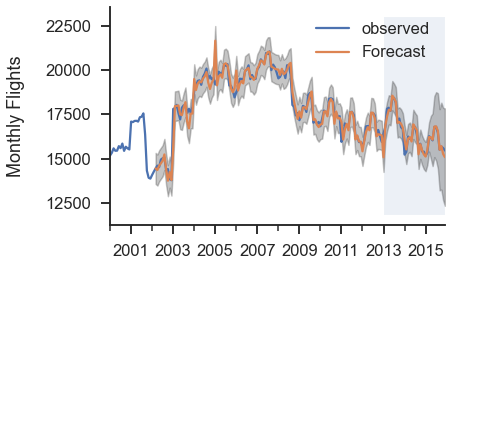

In [100]:
pred_dy = res_seasonal.get_prediction(start="2002-03-01", dynamic="2013-01-01")
pred_dy_ci = pred_dy.conf_int()
ax = y.plot(label="observed")
pred_dy.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(
    pred_dy_ci.index,
    pred_dy_ci.iloc[:, 0],
    pred_dy_ci.iloc[:, 1],
    color="k",
    alpha=0.25,
)
ax.set_ylabel("Monthly Flights")

# Highlight the forecast area
ax.fill_betweenx(
    ax.get_ylim(), pd.Timestamp("2013-01-01"), y.index[-1], alpha=0.1, zorder=-1
)
ax.annotate("Dynamic $\\longrightarrow$", (pd.Timestamp("2013-02-01"), 550))

plt.legend()
sns.despine()